In [1]:
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from math import floor
import matplotlib.animation as animation

In [2]:
output_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'
basecase_subdir = os.path.join(output_path, 'slurm-1826399')
basecase_aerodata = nc.Dataset(os.path.join(basecase_subdir, 'aerosols_d01_2023-06-21_09:00:00'))

# Old fx1fy0 folder: 1826846
fx1fy0_subdir = os.path.join(output_path, 'slurm-1827809')
fx1fy0_aerodata = nc.Dataset(os.path.join(fx1fy0_subdir, 'aerosols_d01_2023-06-21_09:00:00'))
fx1fy0_aerodistdata = nc.Dataset(os.path.join(fx1fy0_subdir, 'aerosol_dist_d01_2023-06-21_09:00:00'))

fx1fy1_subdir = os.path.join(output_path, 'slurm-1828109')
fx1fy1_aerodata = nc.Dataset(os.path.join(fx1fy1_subdir, 'aerosols_d01_2023-06-21_09:00:00'))
fx1fy1_aerodistdata = nc.Dataset(os.path.join(fx1fy1_subdir, 'aerosol_dist_d01_2023-06-21_09:00:00'))

aerodata_dict = {'basecase': basecase_aerodata,
                 'fx1fy0': fx1fy0_aerodata,
                 'fx1fy1': fx1fy1_aerodata
                }

#wrf_data = nc.Dataset(output_dir + '/wrfout_d01_2023-06-21_09:00:00')

In [4]:
x_dim = basecase_aerodata.dimensions['west_east'].size
y_dim = basecase_aerodata.dimensions['south_north'].size
z_dim = basecase_aerodata.dimensions['bottom_top'].size

0.10576212 1.9819766e-09
0.024718063 0.0054337243
0.0124907885 0.010106959


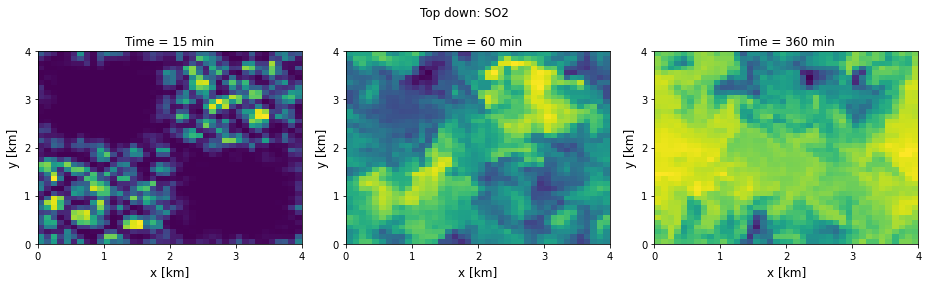

In [261]:
data = fx1fy1_aerodata
#data = basecase_aerodata
#var = 'ccn_pr_003_a2'
var = 'so2'
fig, axs =plt.subplots(1, 3, figsize=(13, 4))
#fig.suptitle(f'Top down {var.upper()}', fontsize=12)
title = 'CCN activity concentration (S=0.03%)'
title = 'SO2'
fig.suptitle(f'Top down: {title}', fontsize=12)
history_timestep = 5 # minutes between output
vmin, vmax= param_data_slice = data[var][:, 0, :, :].min(), data[var][:, 0, :, :].max()
times = [3, 12, 72]
for time, ax in zip(times, axs):
    param_data_slice = data[var][time, 25, :, :]
    ax.pcolormesh(param_data_slice, cmap=plt.cm.viridis)#vmin=vmin, vmax=vmax)
    #ax.contourf(param_data_slice)
    print(param_data_slice.max(), param_data_slice.min())
    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('y [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, y_dim+1, 10))
    ax.set_yticklabels(np.arange(0, 5, 1))
plt.subplots_adjust(wspace=.3)

In [351]:
import matplotlib.colors as mplcolors


0.07682731 1e-16
0.024730645 1e-16
0.012274568 1.1041601e-16


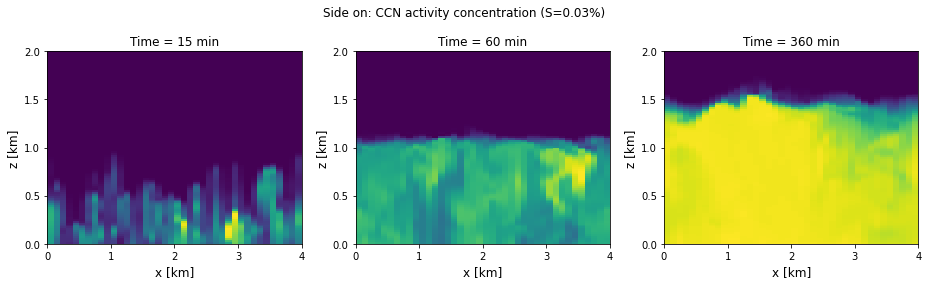

In [262]:
data = fx1fy1_aerodata
#data = basecase_aerodata
var = 'ccn_pr_003_a2'
var = 'so2'
fig, axs =plt.subplots(1, 3, figsize=(13, 4))
#fig.suptitle(f'Top down {var.upper()}', fontsize=12)
title = 'CCN activity concentration (S=0.03%)'
#title = 'SO2'
fig.suptitle(f'Side on: {title}', fontsize=12)
history_timestep = 5 # minutes between output
vmin, vmax= param_data_slice = data[var][:, :, :, 20].min(), data[var][:, :, :, 20].max()
times = [3, 12, 72]
for time, ax in zip(times, axs):
    param_data_slice = data[var][time, :, :, 20]
    ax.pcolormesh(param_data_slice, )#norm=mplcolors.LogNorm(vmin=1e-5, vmax=.03))
    #ax.contourf(param_data_slice)
    print(param_data_slice.max(), param_data_slice.min())
    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, z_dim+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
plt.subplots_adjust(wspace=.3)

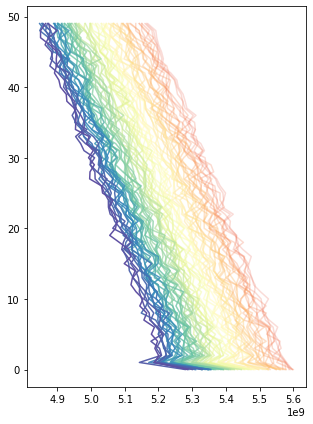

In [39]:
n_times = profile_mean.shape[0]
colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
fig, ax = plt.subplots(1,1, figsize=(5, 7))

for i in np.arange(n_times)[1:]:
    ax.plot(profile_mean[i, :], np.arange(50), color=colors[i], zorder=i, alpha=1-.8*(n_times-i)/n_times)

In [63]:
variables = np.array([var for var in data.variables.keys()])

In [25]:
(basecase_aerodata['ccn_pr_010_a2'][0, :, :, :].sum() - fx1fy0_aerodata['ccn_pr_010_a2'][0, :, :, :].sum()) / basecase_aerodata['ccn_pr_010_a2'][0, :, :, :].sum()

0.0002966193

In [241]:
a = 16/12

In [242]:
math.floor(a)

1

In [27]:
[var for var in data.variables.keys() if var.startswith('ccn_pr')]

['ccn_pr_001_a1',
 'ccn_pr_001_a2',
 'ccn_pr_001_a3',
 'ccn_pr_003_a1',
 'ccn_pr_003_a2',
 'ccn_pr_003_a3',
 'ccn_pr_006_a1',
 'ccn_pr_006_a2',
 'ccn_pr_006_a3',
 'ccn_pr_010_a1',
 'ccn_pr_010_a2',
 'ccn_pr_010_a3']

In [21]:
def plotRelDiff(scenario='fx1fy0', var='ccn_pr_010'):
    pbl_ztop = 100
    pbl_depth = 1 #km
    
    aitken_var = f'{var}_a1'
    accum_var = f'{var}_a2'

    scenario_dataset = aerodata_dict[scenario]

    profile_mean_aitken = scenario_dataset[aitken_var][:, :50, :, :].mean(axis=2).mean(axis=2)
    base_profile_aitken = basecase_aerodata[aitken_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    compare_profile_aitken = scenario_dataset[aitken_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    profile_mean_reldiff_aitken = ( compare_profile_aitken - base_profile_aitken) / base_profile_aitken 

    profile_mean_accum = scenario_dataset[accum_var][:, :50, :, :].mean(axis=2).mean(axis=2)        
    base_profile_accum = basecase_aerodata[accum_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    compare_profile_accum = scenario_dataset[accum_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    profile_mean_reldiff_accum = ( compare_profile_accum - base_profile_accum) / base_profile_accum

    n_times = profile_mean_aitken.shape[0]
    #colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
    n_hours = 6
    colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))
    fig, axs = plt.subplots(1,2, figsize=(12, 6.25))

    for i in np.arange(n_times)[::12]:
        
        color_idx = floor(i/12)
        
        label = None
        lw=1
        if i%12 == 0:
            label=f'time = {color_idx} hrs'
        #if color_idx == 6: # final data point at 6:00
        #    color_idx = 5
        #    label=None
        #print(i, n_times)
        if (i == n_times - 1):
            #print('setting black')
            lw=2.5
            colors[color_idx] = np.array([0, 0, 0, 1])

        axs[0].plot(100*profile_mean_reldiff_aitken[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, label=label, alpha=1-.3*(n_hours-color_idx)/n_hours, lw=lw)
        axs[1].plot(100*profile_mean_reldiff_accum[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, label=label, alpha=1-.3*(n_hours-color_idx)/n_hours, lw=lw)
        #print(profile_mean_reldiff_aitken[i, :])
    ss = float(var.split('_')[2])/100
    fig.suptitle(f'Level-averaged percent error, CCN activity (S={ss:2.2f}%)', fontsize=13)
    for ax, name in zip(axs, ['Aitken', 'Accumulation']):
        ax.set_title(f'{name} mode CCN')
        ax.set_xlabel('CCN concentration percent error (%)', fontsize=12)
        ax.set_ylabel('Altitude [km]', fontsize=12)
        ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
        ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
        ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
        #ax.set_xlim(-30, 30)
        ax.set_ylim(0, 101)
        ax.legend(loc='lower left')
    plt.savefig(f'{scenario}_{var}_level_avgd_pcent_err.pdf', format='pdf', bbox_inches='tight')

In [198]:
def plotRelDiffBoxplots(scenario='fx1fy0', var='ccn_pr_010', time_idx=0):
    pbl_ztop = 100
    pbl_depth = 1 #km
    n_bins_in_vertical = 10
    
    aitken_var = f'{var}_a1'
    accum_var = f'{var}_a2'

    scenario_dataset = aerodata_dict[scenario]

    fig, axs = plt.subplots(1,2, figsize=(12, 6.25))

    ss = float(var.split('_')[2])/100
    fig.suptitle(f'Level-averaged percent error, CCN activity (S={ss:2.2f}%), Time: {5*time_idx} mins', fontsize=13)
    
        #ax.legend(loc='lower left')
    for ax, name in zip(axs, ['Aitken', 'Accumulation']):
        ax.set_title(f'{name} mode CCN')
        ax.set_xlabel('CCN concentration percent error (%)', fontsize=12)
        ax.set_ylabel('Altitude [km]', fontsize=12)


    base_profile_aitken = basecase_aerodata[aitken_var][time_idx, :pbl_ztop, :, :]
    compare_profile_aitken = scenario_dataset[aitken_var][time_idx, :pbl_ztop, :, :]
    profile_reldiff_aitken = 100*( compare_profile_aitken - base_profile_aitken) / base_profile_aitken 

    base_profile_accum = basecase_aerodata[accum_var][time_idx, :pbl_ztop, :, :]
    compare_profile_accum = scenario_dataset[accum_var][time_idx, :pbl_ztop, :, :]
    profile_reldiff_accum = 100*( compare_profile_accum - base_profile_accum) / base_profile_accum

    n_bins_in_vertical = 10
    vertical_grid_size = 100
    vertical_grids_per_bin = int(vertical_grid_size / n_bins_in_vertical)
    binned_reldiff_aitken = profile_reldiff_aitken.reshape(n_bins_in_vertical, vertical_grids_per_bin*40*40).T
    binned_reldiff_accum = profile_reldiff_accum.reshape(n_bins_in_vertical, vertical_grids_per_bin*40*40).T

    axs[0].boxplot(binned_reldiff_aitken, showfliers=False, vert=False,showmeans=True)
    axs[1].boxplot(binned_reldiff_accum, showfliers=False, vert=False,showmeans=True)

    for ax in axs:
        
        ax.set_yticks(np.linspace(0, n_bins_in_vertical, n_bins_in_vertical+1))
        ax.set_yticklabels(np.linspace(0,2, n_bins_in_vertical+1).round(2))
        ax.set_xlim(-125, 300)
        ax.set_ylim(0, n_bins_in_vertical+1)
        ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)


    
    

In [210]:
scenario='fx1fy1'
var='ccn_pr_010'

pbl_ztop = 100
pbl_depth = 1 #km
n_bins_in_vertical = 10

aitken_var = f'{var}_a1'
accum_var = f'{var}_a2'

scenario_dataset = aerodata_dict[scenario]

fig, axs = plt.subplots(1,2, figsize=(12, 6.25))

def animate(time_idx):
    axs[0].clear()
    axs[1].clear()
    
    ss = float(var.split('_')[2])/100
    fig.suptitle(f'Level-averaged percent error, CCN activity (S={ss:2.2f}%)', fontsize=13)

        #ax.legend(loc='lower left')
    for ax, name in zip(axs, ['Aitken', 'Accumulation']):
        ax.set_title(f'{name} mode CCN')
        ax.set_xlabel('CCN concentration percent error (%)', fontsize=12)
        ax.set_ylabel('Altitude [km]', fontsize=12)
    text = axs[0].text(x=.97, y=1.05, s=f'Time: {5*time_idx} mins', transform=axs[0].transAxes, verticalalignment='center',
                        fontsize=12)
    
    base_profile_aitken = basecase_aerodata[aitken_var][time_idx, :pbl_ztop, :, :]
    compare_profile_aitken = scenario_dataset[aitken_var][time_idx, :pbl_ztop, :, :]
    profile_reldiff_aitken = 100*( compare_profile_aitken - base_profile_aitken) / base_profile_aitken 

    base_profile_accum = basecase_aerodata[accum_var][time_idx, :pbl_ztop, :, :]
    compare_profile_accum = scenario_dataset[accum_var][time_idx, :pbl_ztop, :, :]
    profile_reldiff_accum = 100*( compare_profile_accum - base_profile_accum) / base_profile_accum

    n_bins_in_vertical = 10
    vertical_grid_size = 100
    vertical_grids_per_bin = int(vertical_grid_size / n_bins_in_vertical)
    binned_reldiff_aitken = profile_reldiff_aitken.reshape(n_bins_in_vertical, vertical_grids_per_bin*40*40).T
    binned_reldiff_accum = profile_reldiff_accum.reshape(n_bins_in_vertical, vertical_grids_per_bin*40*40).T

    axs[0].boxplot(binned_reldiff_aitken, showfliers=False, vert=False, showmeans=True)
    axs[1].boxplot(binned_reldiff_accum, showfliers=False, vert=False, showmeans=True)
    for ax in axs:
        
        ax.set_yticks(np.linspace(0, n_bins_in_vertical, n_bins_in_vertical+1))
        ax.set_yticklabels(np.linspace(0,2, n_bins_in_vertical+1).round(2))
        ax.set_xlim(-125, 300)
        ax.set_ylim(0, n_bins_in_vertical+1)
        ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)

ani = animation.FuncAnimation(fig, animate, np.arange(basecase_aerodata.dimensions['Time'].size), interval=400) 
ani.save(f'{scenario}_{var}_animation_reldiff_boxplots.gif', writer='imagemagick', fps=8, dpi=300)
plt.close()


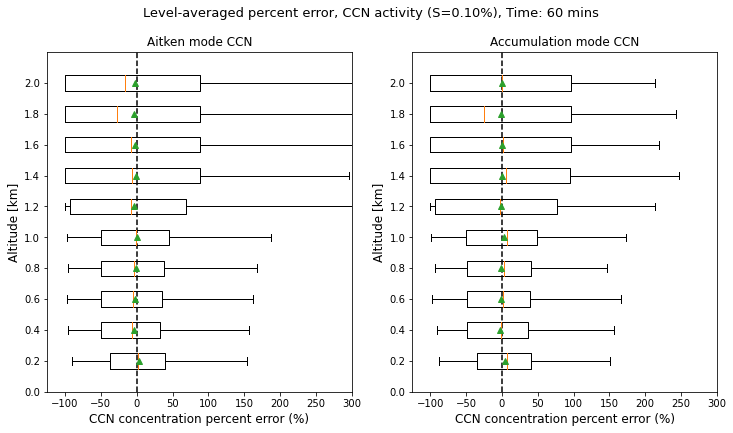

In [208]:
plotRelDiffBoxplots(scenario='fx1fy0', var='ccn_pr_010', time_idx=12)

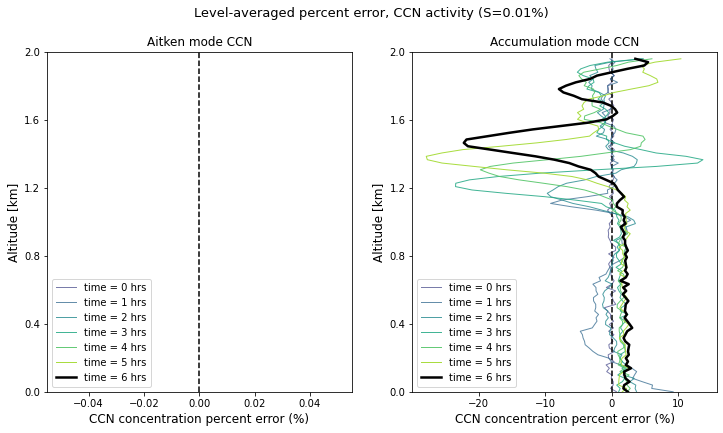

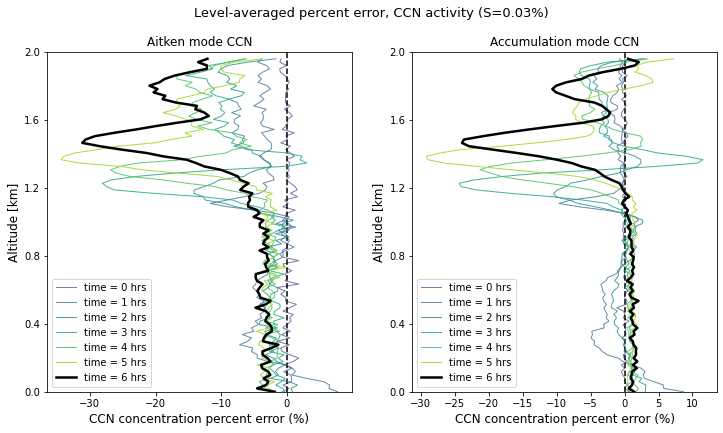

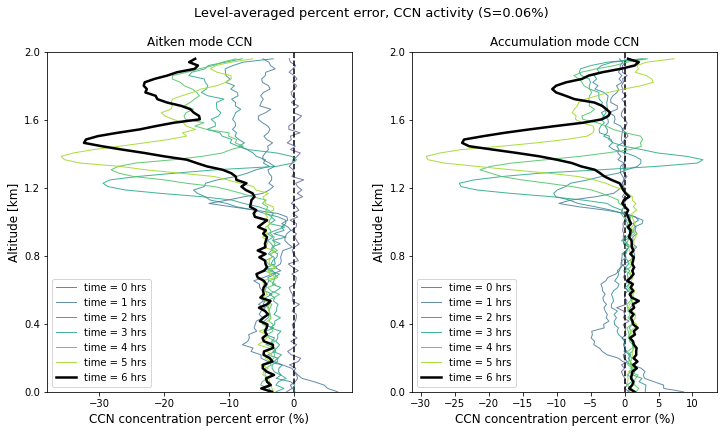

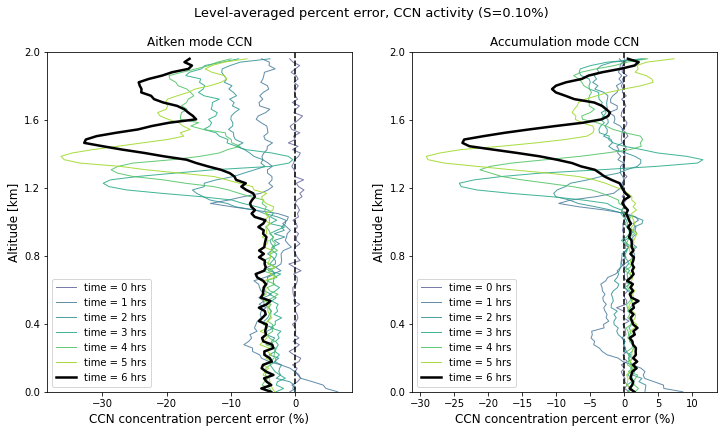

In [28]:
plotRelDiff(scenario='fx1fy0', var='ccn_pr_001')
plotRelDiff(scenario='fx1fy0', var='ccn_pr_003')
plotRelDiff(scenario='fx1fy0', var='ccn_pr_006')
plotRelDiff(scenario='fx1fy0', var='ccn_pr_010')

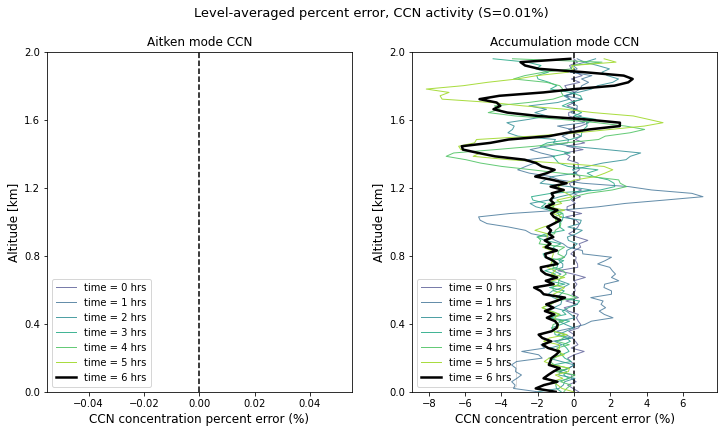

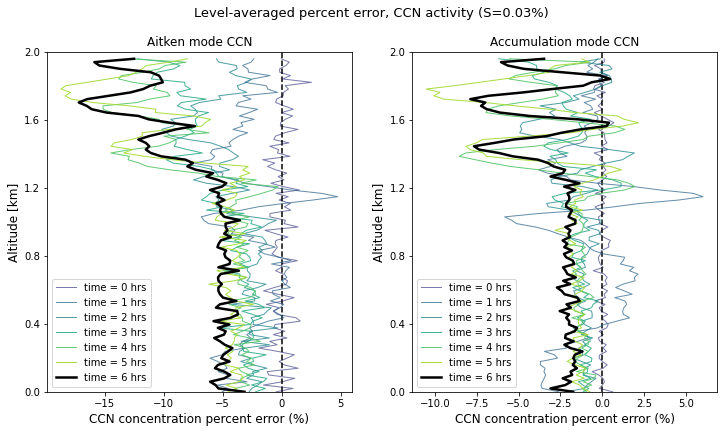

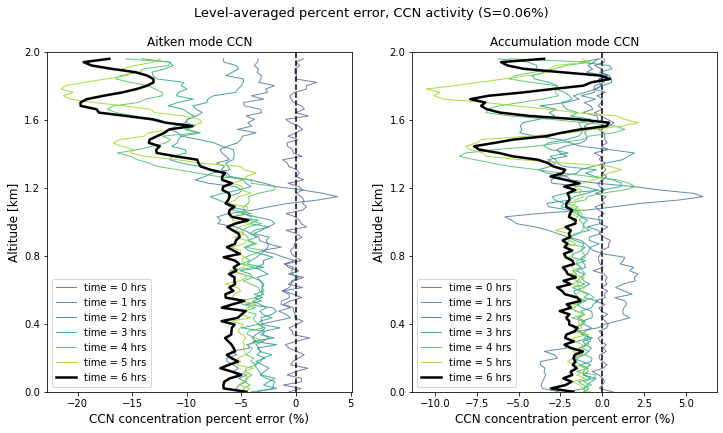

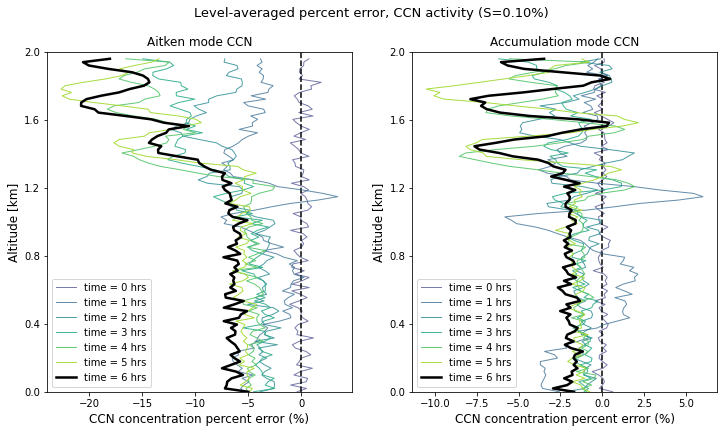

In [29]:
plotRelDiff(scenario='fx1fy1', var='ccn_pr_001')
plotRelDiff(scenario='fx1fy1', var='ccn_pr_003')
plotRelDiff(scenario='fx1fy1', var='ccn_pr_006')
plotRelDiff(scenario='fx1fy1', var='ccn_pr_010')

In [185]:
def plotVerticalProfile(scenario, var='ccn_pr_010'):
    pbl_ztop = 100
    pbl_depth = 1 #km
    
    aitken_var = f'{var}_a1'
    accum_var = f'{var}_a2'

    scenario_dataset = aerodata_dict[scenario]

    base_inverse_dryairdens = basecase_aerodata['ALT'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    scenario_inverse_dryairdens = scenario_dataset['ALT'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

    #profile_mean_aitken = basecase_aerodata[aitken_var][:, :50, :, :].mean(axis=2).mean(axis=2)
    base_profile_aitken = base_inverse_dryairdens*basecase_aerodata[aitken_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    compare_profile_aitken = base_inverse_dryairdens*scenario_dataset[aitken_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

    #profile_mean_accum = basecase_aerodata[accum_var][:, :50, :, :].mean(axis=2).mean(axis=2)        
    base_profile_accum = base_inverse_dryairdens*basecase_aerodata[accum_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    compare_profile_accum = base_inverse_dryairdens*scenario_dataset[accum_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

    n_times = base_profile_data.shape[0]
    #colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
    n_hours = 6
    colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))
    fig, axs = plt.subplots(1,2, figsize=(12, 6.25))

    for i in np.arange(n_times)[::12]:
        
        color_idx = floor(i/12)
        
        label = None
        lw=1.5
        if i%12 == 0:
            label=f'time = {color_idx} hrs'
        #if color_idx == 6: # final data point at 6:00
        #    color_idx = 5
        #    label=None
        #print(i, n_times)
        if (i == n_times - 1):
            #print('setting black')
            lw=2.5
            colors[color_idx] = np.array([0, 0, 0, 1])

        axs[0].plot(compare_profile_aitken[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, label=label, 
            #alpha=1-.3*(n_hours-color_idx)/n_hours, 
            lw=lw)
        axs[0].plot(base_profile_aitken[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, 
            alpha=.8, 
            lw=1.5, ls='-.')

        axs[1].plot(compare_profile_accum[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, label=label, 
            #alpha=1-.3*(n_hours-color_idx)/n_hours, 
            lw=lw)
        axs[1].plot(base_profile_accum[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, 
            alpha=.8, 
            lw=1.5, ls='-.')
        #print(profile_mean_reldiff_aitken[i, :])
    ss = float(var.split('_')[2])/100
    fig.suptitle(f'Level-averaged CCN activity (S={ss:2.2f}%)', fontsize=13)
    for ax, name in zip(axs, ['Aitken', 'Accumulation']):
        ax.set_title(f'{name} mode CCN')
        ax.set_xlabel('CCN concentration [$kg\cdot kg^{-1}$]', fontsize=12)
        ax.set_ylabel('Altitude [km]', fontsize=12)
        ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
        ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
        #ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
        #ax.set_xlim(-30, 30)
        ax.set_ylim(0, 101)
        ax.legend(loc='lower left')
    plt.savefig(f'{scenario}_{var}_level_vertical_profile.pdf', format='pdf', bbox_inches='tight')

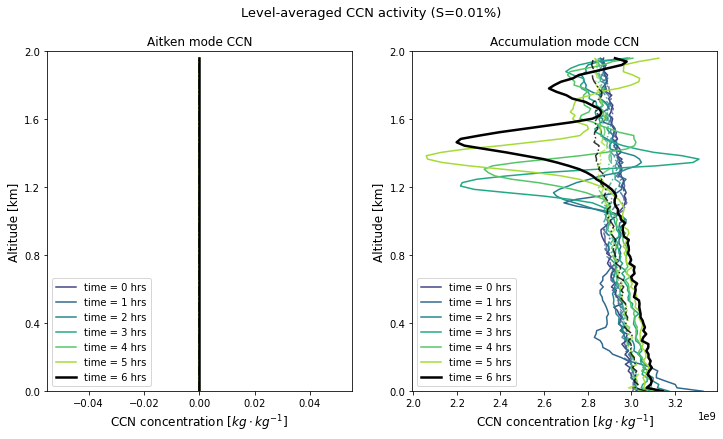

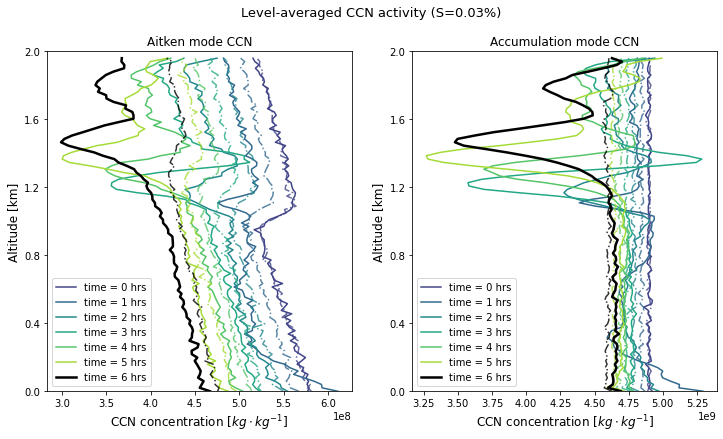

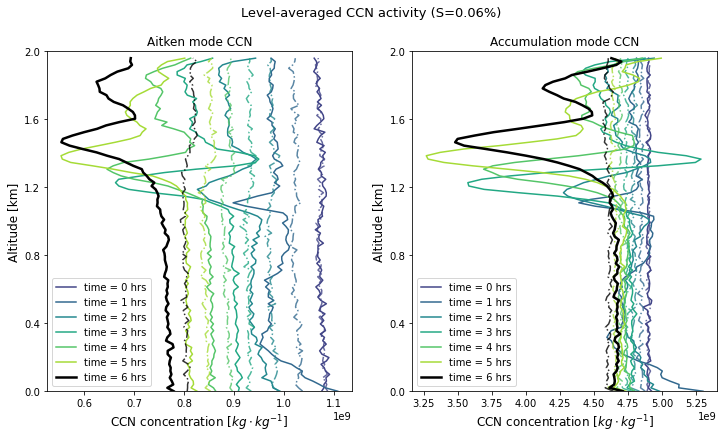

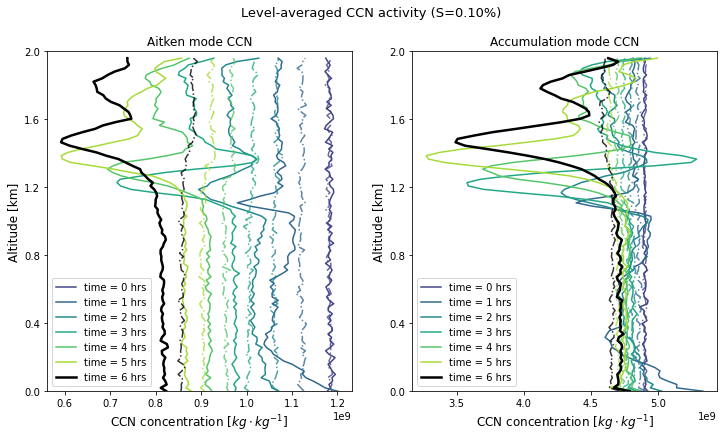

In [186]:
plotVerticalProfile(scenario='fx1fy0', var='ccn_pr_001')
plotVerticalProfile(scenario='fx1fy0', var='ccn_pr_003')
plotVerticalProfile(scenario='fx1fy0', var='ccn_pr_006')
plotVerticalProfile(scenario='fx1fy0', var='ccn_pr_010')

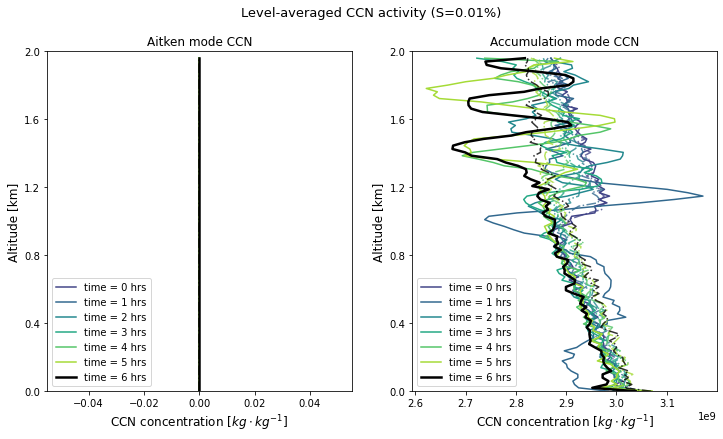

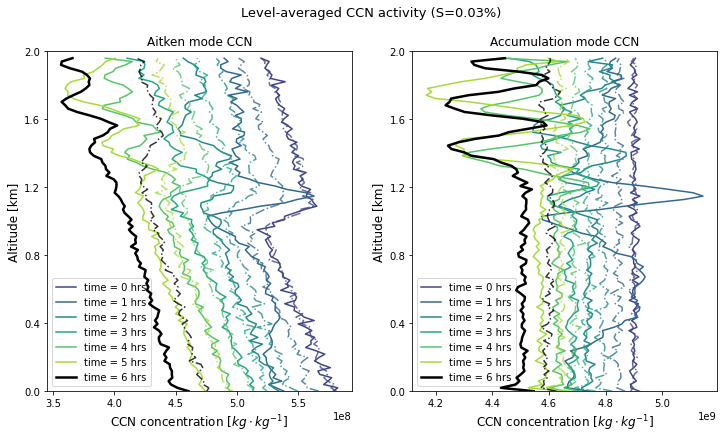

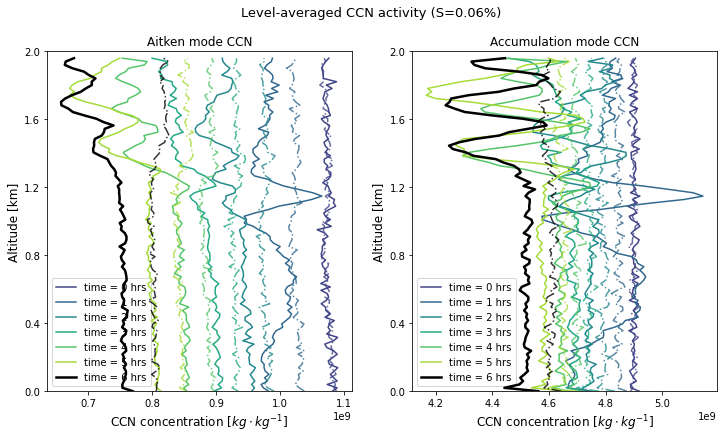

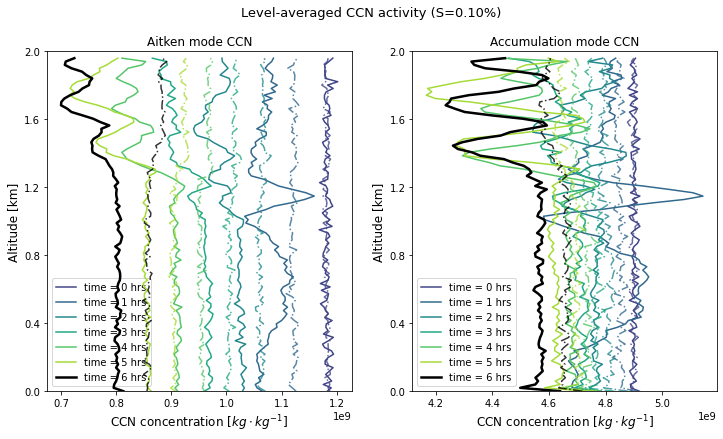

In [173]:
plotVerticalProfile(scenario='fx1fy1', var='ccn_pr_001')
plotVerticalProfile(scenario='fx1fy1', var='ccn_pr_003')
plotVerticalProfile(scenario='fx1fy1', var='ccn_pr_006')
plotVerticalProfile(scenario='fx1fy1', var='ccn_pr_010')

In [54]:
fx1fy1_aerodata[var]

<class 'netCDF4._netCDF4.Variable'>
float32 ccn_pr_003_a2(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: 003, total mass
    units: m^-3
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (73, 100, 40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used

/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


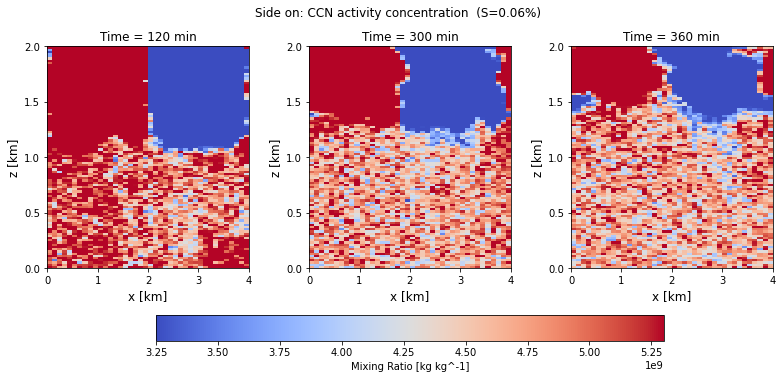

In [30]:
var = 'ccn_pr_006_a2'
#var = 'so2'
pbl_ztop = 100
scenario_dataset = fx1fy0_aerodata
scenario_inverse_dryairdens = fx1fy1_aerodata['ALT'][:, :pbl_ztop, :, :]
var_mixing_ratio = scenario_inverse_dryairdens*scenario_dataset[var][:, :pbl_ztop, :, :]

fig, axs =plt.subplots(1, 3, figsize=(13, 5.5))
#fig.suptitle(f'Side on {var.upper()}', fontsize=12)
ss = float(var.split('_')[2])/100
fig.suptitle(f'Side on: CCN activity concentration  (S={ss:2.2f}%)', fontsize=12)

history_timestep = 5 # minutes between output
times = [24, 60, 72]
#vmin, vmax= param_data_slice = profile_mean_reldiff[0, :, :, 20].min(), profile_mean_reldiff[0, :, :, 20].max()
vmin = 3.25e9
vmax = 5.3e9
for time, ax in zip(times, axs):
    param_data_slice = var_mixing_ratio[time, :, :, 20]
    #ax.contourf(param_data_slice)
    colormesh = ax.pcolormesh(param_data_slice, vmin=vmin, vmax=vmax, cmap=plt.cm.coolwarm)

    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, z_dim+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
plt.subplots_adjust(wspace=.3)
cbar = fig.colorbar(colormesh, ax=axs, orientation='horizontal', fraction=.1, shrink=.7)
cbar.set_label('Mixing Ratio [kg kg^-1]')
plt.subplots_adjust(wspace=.3, bottom=.32)
plt.show()

In [31]:
var = 'ccn_pr_006_a2'
#var = 'CHI_CCN'
scenario = 'fx1fy0';
scenario_dataset = aerodata_dict[scenario]
scenario_inverse_dryairdens = scenario_dataset['ALT'][:, :pbl_ztop, :, :]
var_mixing_ratio = scenario_inverse_dryairdens*scenario_dataset[var][:, :pbl_ztop, :, :]

fig, ax =plt.subplots(1, 1, figsize=(7, 7))
#fig.suptitle(f'Side on {var.upper()}', fontsize=12)


history_timestep = 5 # minutes between output
vmin = 3.25e9
vmax = 5.3e9
param_data_slice = var_mixing_ratio[0, :, :, 20]
#ax.contourf(param_data_slice)
colormesh = ax.pcolormesh(param_data_slice, vmin=vmin, vmax=vmax, cmap=plt.cm.coolwarm)
#cb = fig.colorbar(colormesh, cax=cax)

def animatecrossection(time_idx):
    #cax.cla()

    ss = float(var.split('_')[2])/100
    fig.suptitle(f'CCN mixing ratio (S={ss:2.2f}%)', fontsize=13)
    text = axs[0].text(x=.97, y=1.05, s=f'Time: {5*time_idx} mins', transform=axs[0].transAxes, verticalalignment='center',
                        fontsize=12)
    
    param_data_slice = var_mixing_ratio[time_idx, :, :, 20]

    #ax.contourf(param_data_slice)
    colormesh = ax.pcolormesh(param_data_slice, vmin=vmin, vmax=vmax, cmap=plt.cm.coolwarm)
    ax.set_title(f'Time = {history_timestep*time_idx} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, z_dim+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
    
    #fig.colorbar(colormesh, cax=cax)
    #cbar = fig.colorbar(colormesh, ax=axs, orientation='horizontal', fraction=.1, shrink=.7)
    #cbar.set_label('Relative Error')
    #plt.subplots_adjust(wspace=.3, bottom=.32)

ani = animation.FuncAnimation(fig, animatecrossection, np.arange(basecase_aerodata.dimensions['Time'].size)[:], interval=400) 
ani.save(f'{scenario}_{var}_mixingratio_animation_crosssection.gif', writer='imagemagick', fps=8, dpi=300)
plt.close()


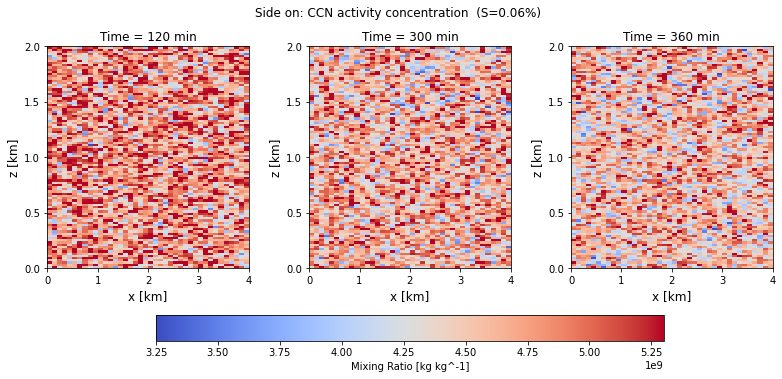

In [24]:
var = 'ccn_pr_006_a2'
#var = 'so2'
pbl_ztop = 100
scenario_dataset = basecase_aerodata
scenario_inverse_dryairdens = fx1fy1_aerodata['ALT'][:, :pbl_ztop, :, :]
var_mixing_ratio = scenario_inverse_dryairdens*scenario_dataset[var][:, :pbl_ztop, :, :]

fig, axs =plt.subplots(1, 3, figsize=(13, 5.5))
#fig.suptitle(f'Side on {var.upper()}', fontsize=12)
ss = float(var.split('_')[2])/100
fig.suptitle(f'Side on: CCN activity concentration  (S={ss:2.2f}%)', fontsize=12)

history_timestep = 5 # minutes between output
times = [24, 60, 72]
#vmin, vmax= param_data_slice = profile_mean_reldiff[0, :, :, 20].min(), profile_mean_reldiff[0, :, :, 20].max()
vmin = 3.25e9
vmax = 5.3e9
for time, ax in zip(times, axs):
    param_data_slice = var_mixing_ratio[time, :, 20, :]
    #ax.contourf(param_data_slice)
    colormesh = ax.pcolormesh(param_data_slice, vmin=vmin, vmax=vmax, cmap=plt.cm.coolwarm)

    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, z_dim+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
plt.subplots_adjust(wspace=.3)
cbar = fig.colorbar(colormesh, ax=axs, orientation='horizontal', fraction=.1, shrink=.7)
cbar.set_label('Mixing Ratio [kg kg^-1]')
plt.subplots_adjust(wspace=.3, bottom=.32)
plt.show()

1.6390088 -1.0
1.5392348 -0.99982995
1.8855023 -0.97779244


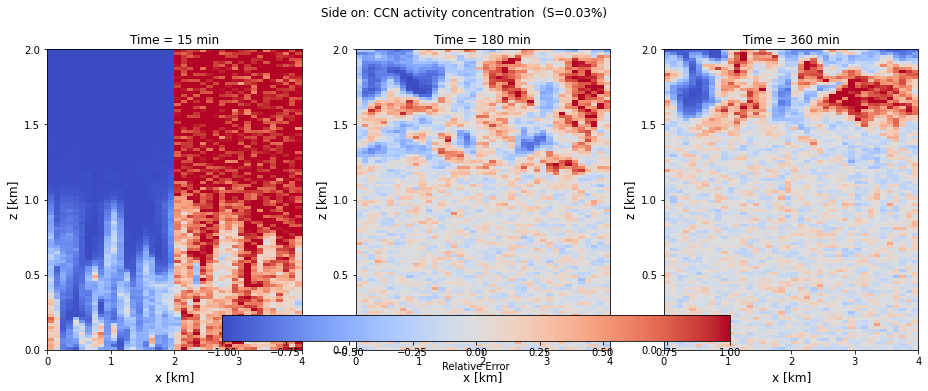

In [259]:
var = 'ccn_pr_003_a2'
#var = 'so2'
base_profile = basecase_aerodata[var][:, :, :, :]
compare_profile = fx1fy1_aerodata[var][:, :, :, :]
profile_mean_reldiff = ( compare_profile - base_profile) / base_profile 
#var = 'so2'
fig, axs =plt.subplots(1, 3, figsize=(13, 5.5))
#fig.suptitle(f'Side on {var.upper()}', fontsize=12)
ss = float(var.split('_')[2])/100
fig.suptitle(f'Side on: CCN activity concentration  (S={ss:2.2f}%)', fontsize=12)

history_timestep = 5 # minutes between output
times = [3, 36, 72]
vmin, vmax= param_data_slice = profile_mean_reldiff[0, :, :, 20].min(), profile_mean_reldiff[0, :, :, 20].max()
for time, ax in zip(times, axs):
    param_data_slice = profile_mean_reldiff[time, :, :, 20]
    #ax.contourf(param_data_slice)
    colormesh = ax.pcolormesh(param_data_slice, vmin=-1, vmax=1, 
                              cmap=plt.cm.coolwarm)
    print(param_data_slice.max(), param_data_slice.min())
    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, z_dim+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
plt.subplots_adjust(wspace=.3)
cbar = fig.colorbar(colormesh, ax=axs, orientation='horizontal', fraction=.1, shrink=.7)
cbar.set_label('Relative Error')
plt.subplots_adjust(wspace=.3, bottom=.32)
plt.show()

2.5738692 -1.0
1.7315588 -0.9301404
1.097502 -0.5666386


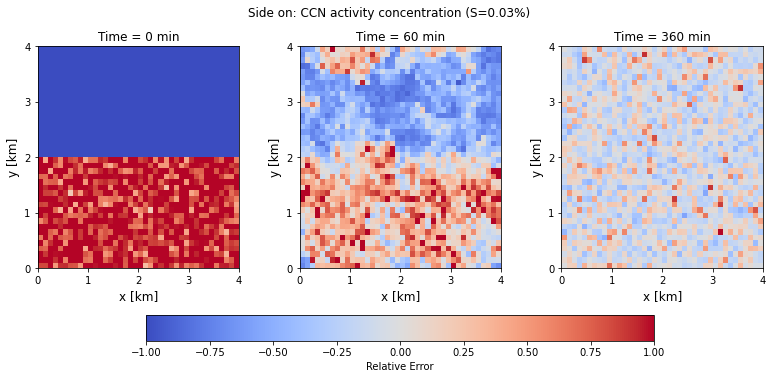

In [132]:
var = 'ccn_pr_010_a1'
#var = 'CHI_CCN'
base_profile = basecase_aerodata[var][:, :, :, :]
compare_profile = fx1fy0_aerodata[var][:, :, :, :]
profile_mean_reldiff = ( compare_profile - base_profile) / base_profile 

fig, axs =plt.subplots(1, 3, figsize=(13, 5.5))
#fig.suptitle(f'Side on {var.upper()}', fontsize=12)
fig.suptitle(f'Top down: CCN activity concentration (S=0.03%)', fontsize=12)

history_timestep = 5 # minutes between output
times = [0, 12, 72]
vmin, vmax= param_data_slice = profile_mean_reldiff[0, 1, :, :].min(), profile_mean_reldiff[0, 1, :, :].max()
for time, ax in zip(times, axs):
    param_data_slice = profile_mean_reldiff[time, 25, :, :]
    #ax.contourf(param_data_slice)
    colormesh = ax.pcolormesh(param_data_slice, vmin=-1, vmax=1, cmap=plt.cm.coolwarm)
    print(param_data_slice.max(), param_data_slice.min())
    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('y [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, y_dim+1, 10))
    ax.set_yticklabels(np.arange(0, 5, 1))
cbar = fig.colorbar(colormesh, ax=axs, orientation='horizontal', fraction=.1, shrink=.7)
cbar.set_label('Relative Error')
plt.subplots_adjust(wspace=.3, bottom=.32)
plt.show()

In [222]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [256]:
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

var = 'ccn_pr_010_a1'
#var = 'CHI_CCN'
base_profile = basecase_aerodata[var][:, :, :, :]
compare_profile = fx1fy0_aerodata[var][:, :, :, :]
profile_mean_reldiff = ( compare_profile - base_profile) / base_profile 

fig, ax =plt.subplots(1, 1, figsize=(7, 7))
#fig.suptitle(f'Side on {var.upper()}', fontsize=12)


history_timestep = 5 # minutes between output
times = [0, 12, 72]
vmin, vmax= param_data_slice = profile_mean_reldiff[0, :, :, 20].min(), profile_mean_reldiff[0, :, :, 20].max()

param_data_slice = profile_mean_reldiff[0, :, :, 20]
#ax.contourf(param_data_slice)
colormesh = ax.pcolormesh(param_data_slice, vmin=-1, vmax=1, cmap=plt.cm.coolwarm)
cb = fig.colorbar(colormesh, cax=cax)

def animatecrossection(time_idx):
    cax.cla()

    ss = float(var.split('_')[2])/100
    fig.suptitle(f'CCN activity percent error (S={ss:2.2f}%)', fontsize=13)
    text = axs[0].text(x=.97, y=1.05, s=f'Time: {5*time_idx} mins', transform=axs[0].transAxes, verticalalignment='center',
                        fontsize=12)
    
    param_data_slice = profile_mean_reldiff[time_idx, :, :, 20]
    #ax.contourf(param_data_slice)
    colormesh = ax.pcolormesh(param_data_slice, vmin=-1, vmax=1, cmap=plt.cm.coolwarm)
    ax.set_title(f'Time = {history_timestep*time_idx} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, z_dim+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
    
    fig.colorbar(colormesh, cax=cax)
    #cbar = fig.colorbar(colormesh, ax=axs, orientation='horizontal', fraction=.1, shrink=.7)
    #cbar.set_label('Relative Error')
    #plt.subplots_adjust(wspace=.3, bottom=.32)

ani = animation.FuncAnimation(fig, animatecrossection, np.arange(basecase_aerodata.dimensions['Time'].size)[:], interval=400) 
ani.save(f'{scenario}_{var}_animation_reldiff_crosssection.gif', writer='imagemagick', fps=8, dpi=300)
plt.close()


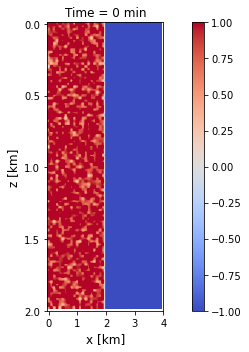

In [255]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

div = make_axes_locatable(ax)
cax = div.append_axes('right', '10%', '25%')
data = profile_mean_reldiff[0, :, :, 20]
im = ax.imshow(data,vmin=-1, vmax=1, cmap=plt.cm.coolwarm)
cb = fig.colorbar(im, cax=cax)
tx = ax.set_title('')

def animate(i):
   cax.cla()
   data = data = profile_mean_reldiff[i, :, :, 20]
   im = ax.imshow(data, vmin=-1, vmax=1, cmap=plt.cm.coolwarm)
   fig.colorbar(im, cax=cax)
   tx.set_text('Frame {0}'.format(i))
   ax.set_title(f'Time = {history_timestep*i} min')
   ax.set_xlabel('x [km]', fontsize=12)
   ax.set_ylabel('z [km]', fontsize=12)
   ax.set_xticks(np.arange(0, x_dim+1, 10))
   ax.set_xticklabels(np.arange(0, 5, 1))
   ax.set_yticks(np.arange(0, z_dim+1, 25))
   ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
   
ani = animation.FuncAnimation(fig, animate, frames=1)
ani.save(f'testcolorbaranimation.gif', writer='imagemagick', fps=8, dpi=300)


In region with non-zero ICs, emissions

Text(0.5, 0, 'Diameter [m]')

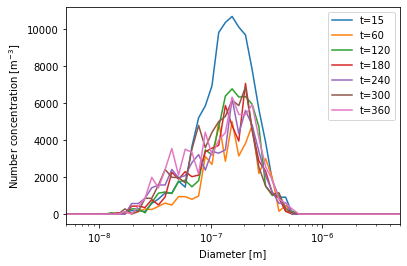

In [48]:
i = 20
j = 10
k = 25

dist_data = fx1fy0_aerodistdata

for time in [3, 12, 24, 36, 48, 60, 72]:
    x_vals = []
    bin_vals = []

    bin_edges = fx1fy0_aerodata['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]

    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = dist_data[f'num_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()/1e6
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    plt.plot(fx1fy0_aerodata['BIN_CENTERS'][:].data[0], bin_vals, label=f't={5*time}')
    plt.xscale('log')
plt.xlim(5e-9, 5e-6)
plt.legend()
plt.ylabel('Number concentration [m$^{-3}$]')
plt.xlabel('Diameter [m]')

Text(0.5, 0, 'Diameter [m]')

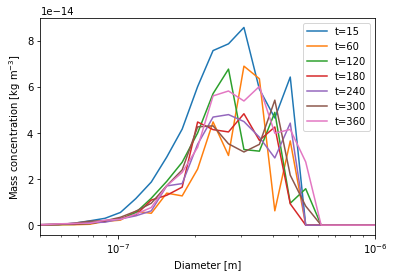

In [52]:
i = 20
j = 10
k = 25

dist_data = fx1fy0_aerodistdata

for time in [3, 12, 24, 36, 48, 60, 72]:
    x_vals = []
    bin_vals = []

    bin_edges = fx1fy0_aerodata['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]

    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = dist_data[f'mass_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()/1e6
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    plt.plot(fx1fy0_aerodata['BIN_CENTERS'][:].data[0], bin_vals, label=f't={5*time}')
    plt.xscale('log')
plt.xlim(5e-8, 1e-6)
plt.legend()
plt.ylabel('Mass concentration [kg m$^{-3}$]')
plt.xlabel('Diameter [m]')

Text(0.5, 0, 'Diameter [m]')

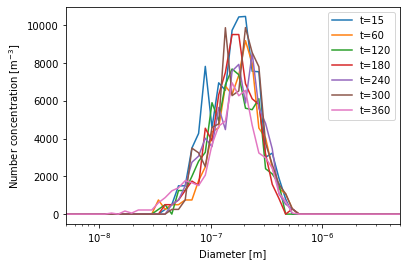

In [50]:
i = 20
j = 10
k = 75

dist_data = fx1fy0_aerodistdata

for time in [3, 12, 24, 36, 48, 60, 72]:
    x_vals = []
    bin_vals = []

    bin_edges = fx1fy0_aerodata['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]

    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = dist_data[f'num_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()/1e6
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    plt.plot(fx1fy0_aerodata['BIN_CENTERS'][:].data[0], bin_vals, label=f't={5*time}')
    plt.xscale('log')
plt.xlim(5e-9, 5e-6)
plt.legend()
plt.ylabel('Number concentration [m$^{-3}$]')
plt.xlabel('Diameter [m]')

In [76]:
basecase_aerodata['TOT_COAGULATION_NUM_CONC']

<class 'netCDF4._netCDF4.Variable'>
float32 TOT_COAGULATION_NUM_CONC(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: total number concentration of particles that coagulated within grid cell
    units: 
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (73, 100, 40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used

In [187]:
def plotCoaguationProfile(scenario='fx1fy0', var='TOT_COAGULATION_NUM_CONC'):
    pbl_ztop = 100
    pbl_depth = 1 #km

    scenario_dataset = aerodata_dict[scenario]
    
    base_inverse_dryairdens = basecase_aerodata['ALT'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    scenario_inverse_dryairdens = basecase_aerodata['ALT'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

    # level mean mixing ratio of particles in a grid cell that coagulated
    base_profile_data = base_inverse_dryairdens*basecase_aerodata[var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    compare_profile_data = scenario_inverse_dryairdens*scenario_dataset[var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

    n_times = base_profile_data.shape[0]
    #colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
    n_hours = 6
    colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))
    fig, ax = plt.subplots(1,1, figsize=(6.25, 6.25))

    for i in np.arange(n_times)[::12]:
        
        color_idx = floor(i/12)
        
        label = None
        lw=1.5
        if i%12 == 0:
            label=f'time = {color_idx} hrs'
        #if color_idx == 6: # final data point at 6:00
        #    color_idx = 5
        #    label=None
        #print(i, n_times)
        if (i == n_times - 1):
            #print('setting black')
            lw=2.5
            colors[color_idx] = np.array([0, 0, 0, 1])

        ax.plot(compare_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, label=label, 
            #alpha=1-.3*(n_hours-color_idx)/n_hours, 
            lw=lw)
        ax.plot(base_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, 
            alpha=.8, 
            lw=1.5, ls='-.')

    #fig.suptitle(f'Level-averaged CCN activity (S={ss:2.2f}%)', fontsize=13)
    ax.set_title(f'Level mean mixing ratio of particles that coagulated')
    ax.set_xlabel('Mixing ratio [$kg\cdot kg^{-1}$]', fontsize=12)
    ax.set_ylabel('Altitude [km]', fontsize=12)
    ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
    ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
    #ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
    #ax.set_xlim(-30, 30)
    ax.set_ylim(0, 101)
    ax.legend(loc='upper right')
    plt.savefig(f'{scenario}_{var.lower()}_level_vertical_profile.pdf', format='pdf', bbox_inches='tight')

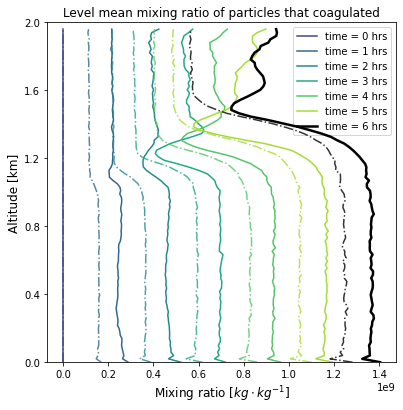

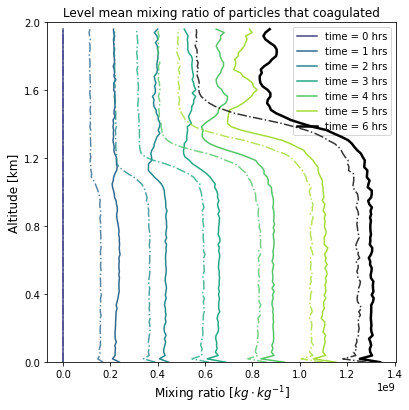

In [188]:
plotCoaguationProfile(scenario='fx1fy0', var='TOT_COAGULATION_NUM_CONC')
plotCoaguationProfile(scenario='fx1fy1', var='TOT_COAGULATION_NUM_CONC')

In [ ]:
fx1fy0_nochem_nocoag_subdir = os.path.join(output_path, 'slurm-1830321')
fx1fy0_nochem_nocoag_aerodata = nc.Dataset(os.path.join(fx1fy0_nochem_nocoag_subdir, 'aerosols_d01_2023-06-21_09:00:00'))
fx1fy0_nochem_nocoag_aerodistdata = nc.Dataset(os.path.join(fx1fy0_nochem_nocoag_subdir, 'aerosol_dist_d01_2023-06-21_09:00:00'))

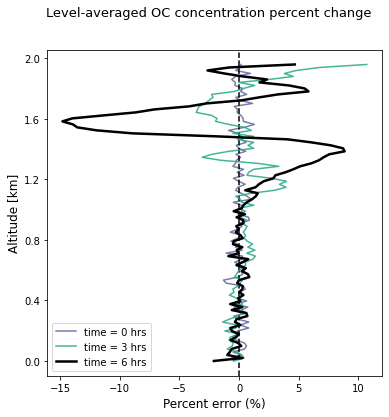

In [79]:
var = 'pmc_OC'

pbl_ztop = 100
pbl_depth = 1 #km

scenario_dataset = aerodata_dict['fx1fy0']

base_inverse_dryairdens = scenario_dataset['ALT'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

profile_mean = base_inverse_dryairdens*scenario_dataset[var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
base_profile = base_inverse_dryairdens*scenario_dataset[var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
compare_profile = base_inverse_dryairdens*fx1fy0_nochem_nocoag_aerodata[var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
profile_mean_reldiff = ( compare_profile - base_profile) / base_profile

scenario_mixing_ratio = base_inverse_dryairdens*compare_profile
base_mixing_ratio = base_inverse_dryairdens*base_profile

n_times = profile_mean.shape[0]
n_hours = 6
colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))
fig, ax = plt.subplots(1, figsize=(6, 6))

for i in np.arange(n_times)[::36]:
    color_idx = floor(i/12)
    label = None
    lw=1.5
    if i%12 == 0:
        label=f'time = {color_idx} hrs'

    if (i == n_times - 1):
        lw=2.5
        colors[color_idx] = np.array([0, 0, 0, 1])

    ax.plot(100*profile_mean_reldiff[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, label=label, alpha=1-.3*(n_hours-color_idx)/n_hours, lw=lw)

    
#ss = float(var.split('_')[2])/100
fig.suptitle(f'Level-averaged OC concentration percent change', fontsize=13)
#ax.set_title(f'{name} mode CCN')
ax.set_xlabel('Percent error (%)', fontsize=12)
ax.set_ylabel('Altitude [km]', fontsize=12)
ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
#ax.set_xlim(.75, 1.05)
#ax.set_ylim(0, 101)
ax.legend(loc='lower left')
plt.savefig(f'{scenario}_nochem_nocoag_compare_{var}_level_vertical_profile.pdf', format='pdf', bbox_inches='tight')


In [52]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines




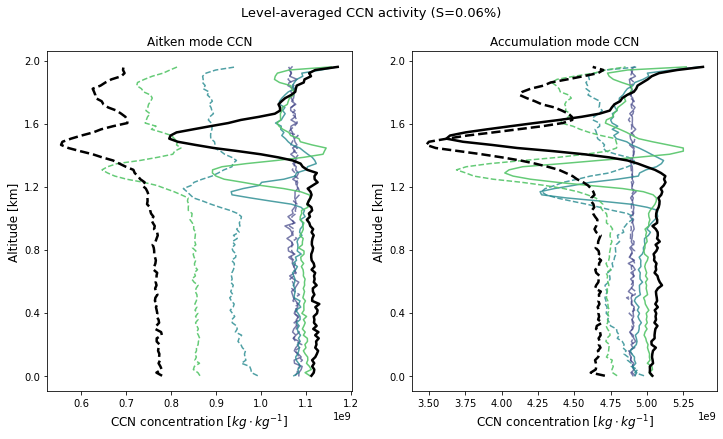

In [80]:
var = 'ccn_pr_006'
scenario = 'fx1fy0'

pbl_ztop = 100
pbl_depth = 1 #km

aitken_var = f'{var}_a1'
accum_var = f'{var}_a2'

compare_dataset = aerodata_dict[scenario]

base_inverse_dryairdens = compare_dataset['ALT'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
scenario_inverse_dryairdens = fx1fy0_nochem_nocoag_aerodata['ALT'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

base_profile_aitken = base_inverse_dryairdens*compare_dataset[aitken_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
scenario_profile_aitken = base_inverse_dryairdens*fx1fy0_nochem_nocoag_aerodata[aitken_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

base_profile_accum = base_inverse_dryairdens*compare_dataset[accum_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
scenario_profile_accum = base_inverse_dryairdens*fx1fy0_nochem_nocoag_aerodata[accum_var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)


n_times = profile_mean.shape[0]
n_hours = 6
colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))
fig, axs = plt.subplots(1,2, figsize=(12, 6.25))

for i in np.arange(n_times)[::24]:
    color_idx = floor(i/12)
    label = None
    lw=1.5
    if i%12 == 0:
        label=f'time = {color_idx} hrs'

    if (i == n_times - 1):
        lw=2.5
        colors[color_idx] = np.array([0, 0, 0, 1])

    #ax.plot(100*profile_mean_reldiff[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
    #    zorder=i, label=label, alpha=1-.3*(n_hours-color_idx)/n_hours, lw=lw)

    axs[0].plot(base_profile_aitken[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, #label=label, 
        alpha=1-.3*(n_hours-color_idx)/n_hours, lw=lw, ls='--')

    axs[0].plot(scenario_profile_aitken[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, label=label, alpha=1-.3*(n_hours-color_idx)/n_hours, lw=lw)

    axs[1].plot(base_profile_accum[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, #label=label, 
        alpha=1-.3*(n_hours-color_idx)/n_hours, lw=lw, ls='--')

    axs[1].plot(scenario_profile_accum[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, label=label, alpha=1-.3*(n_hours-color_idx)/n_hours, lw=lw)


ss = float(var.split('_')[2])/100
fig.suptitle(f'Level-averaged CCN activity (S={ss:2.2f}%)', fontsize=13)
for ax, name in zip(axs, ['Aitken', 'Accumulation']):
    ax.set_title(f'{name} mode CCN')
    ax.set_xlabel('CCN concentration [$kg\cdot kg^{-1}$]', fontsize=12)
    ax.set_ylabel('Altitude [km]', fontsize=12)
    ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
    ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
    #ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
    #ax.set_xlim(.75, 1.05)
    #ax.set_ylim(0, 101)

# Add two legends, first for species and second for specifying overlapping/non-overlapping precursor patterns
#leg = ax.legend(handles=legend_patches)
#ax.add_artist(leg)
#h = [mlines.Line2D(color=color, label=label)  for i,label,color in 
#     zip(range(2), ['Overlapping', 'Non-overlapping'], ['#434343', '#a4a4a4'])]
#plt.legend(handles=h, loc='center left', bbox_to_anchor=(1.03, .5), title="Precursors")


#handles = [mlines.Line2D([], [], marker=marker, mec='k', mfc='w', ls='') for marker in ['o', '^']]
#ax[0].legend(handles, ['Radial', 'Transit'], loc=(1.01, 0),title="Detection")

plt.savefig(f'{scenario}_nochem_nocoag_compare_{var}_level_vertical_profile.pdf', format='pdf', bbox_inches='tight')



13285129000.0 1.3078264
11063558000.0 356522530.0
6711560700.0 3489725200.0


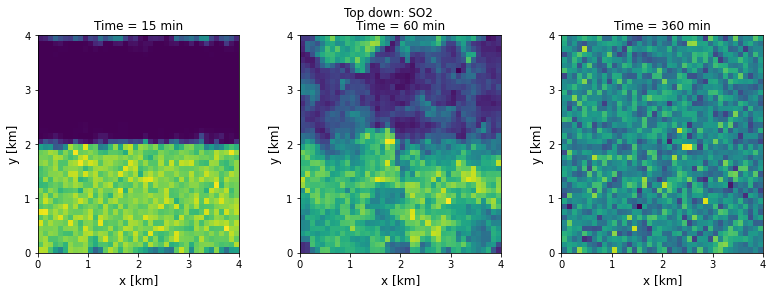

In [6]:
data = fx1fy0_nochem_nocoag_aerodata
#data = basecase_aerodata
var = 'ccn_pr_003_a2'
#var = 'so2'
fig, axs =plt.subplots(1, 3, figsize=(13, 4))
#fig.suptitle(f'Top down {var.upper()}', fontsize=12)
title = 'CCN activity concentration (S=0.03%)'
title = 'SO2'
fig.suptitle(f'Top down: {title}', fontsize=12)
history_timestep = 5 # minutes between output
vmin, vmax= param_data_slice = data[var][:, 0, :, :].min(), data[var][:, 0, :, :].max()
times = [3, 12, 72]
for time, ax in zip(times, axs):
    param_data_slice = data[var][time, 25, :, :]
    ax.pcolormesh(param_data_slice, cmap=plt.cm.viridis)#vmin=vmin, vmax=vmax)
    #ax.contourf(param_data_slice)
    print(param_data_slice.max(), param_data_slice.min())
    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('y [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, y_dim+1, 10))
    ax.set_yticklabels(np.arange(0, 5, 1))
plt.subplots_adjust(wspace=.3)

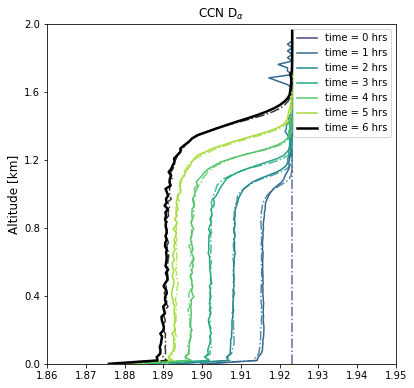

In [91]:
pbl_ztop = 100
pbl_depth = 1 #km

base_profile_data = basecase_aerodata['D_ALPHA_CCN'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
compare_profile_data = fx1fy1_aerodata['D_ALPHA_CCN'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

n_times = base_profile_data.shape[0]
#colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
n_hours = 6
colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))
fig, ax = plt.subplots(1,1, figsize=(6.25, 6.25))

for i in np.arange(n_times)[::12]:
    
    color_idx = floor(i/12)
    
    label = None
    lw=1.5
    if i%12 == 0:
        label=f'time = {color_idx} hrs'
    #if color_idx == 6: # final data point at 6:00
    #    color_idx = 5
    #    label=None
    #print(i, n_times)
    if (i == n_times - 1):
        #print('setting black')
        lw=2.5
        colors[color_idx] = np.array([0, 0, 0, 1])

    ax.plot(compare_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, label=label, 
        #alpha=1-.3*(n_hours-color_idx)/n_hours, 
        lw=lw)
    ax.plot(base_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, 
        alpha=.8, 
        lw=1.5, ls='-.')

#fig.suptitle(f'Level-averaged CCN activity (S={ss:2.2f}%)', fontsize=13)
ax.set_title('CCN D$_{\\alpha}$')
#ax.set_xlabel('Number concentration [m^-3]', fontsize=12)
ax.set_ylabel('Altitude [km]', fontsize=12)
ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
#ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
ax.set_xlim(1.86, 1.95)
ax.set_ylim(0, 101)
ax.legend(loc='upper right')

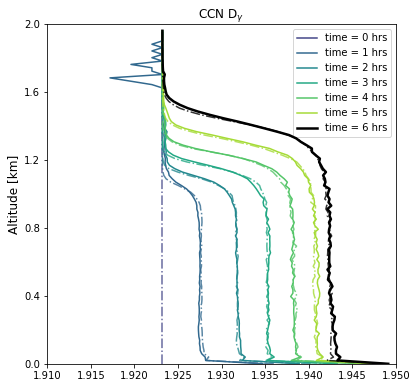

In [92]:
pbl_ztop = 100
pbl_depth = 1 #km

base_profile_data = basecase_aerodata['D_GAMMA_CCN'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
compare_profile_data = fx1fy1_aerodata['D_GAMMA_CCN'][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

n_times = base_profile_data.shape[0]
#colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
n_hours = 6
colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))
fig, ax = plt.subplots(1,1, figsize=(6.25, 6.25))

for i in np.arange(n_times)[::12]:
    
    color_idx = floor(i/12)
    
    label = None
    lw=1.5
    if i%12 == 0:
        label=f'time = {color_idx} hrs'
    #if color_idx == 6: # final data point at 6:00
    #    color_idx = 5
    #    label=None
    #print(i, n_times)
    if (i == n_times - 1):
        #print('setting black')
        lw=2.5
        colors[color_idx] = np.array([0, 0, 0, 1])

    ax.plot(compare_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, label=label, 
        #alpha=1-.3*(n_hours-color_idx)/n_hours, 
        lw=lw)
    ax.plot(base_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, 
        alpha=.8, 
        lw=1.5, ls='-.')

#fig.suptitle(f'Level-averaged CCN activity (S={ss:2.2f}%)', fontsize=13)
ax.set_title('CCN D$_{\\gamma}$')
#ax.set_xlabel('Number concentration [m^-3]', fontsize=12)
ax.set_ylabel('Altitude [km]', fontsize=12)
ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
#ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
ax.set_xlim(1.91, 1.95)
ax.set_ylim(0, 101)
ax.legend(loc='upper right')

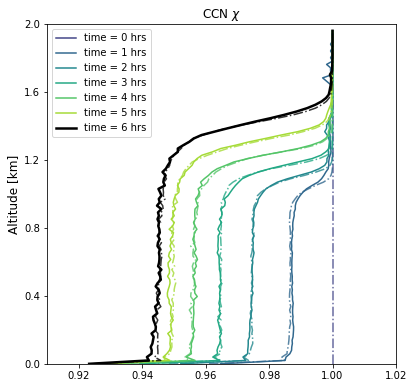

In [102]:
pbl_ztop = 100
pbl_depth = 1 #km

var = 'CHI_CCN'
#var = 'CHI_CCN_SUBMICRON'
base_profile_data = basecase_aerodata[var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
compare_profile_data = fx1fy1_aerodata[var][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

n_times = base_profile_data.shape[0]
#colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
n_hours = 6
colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))
fig, ax = plt.subplots(1,1, figsize=(6.25, 6.25))

for i in np.arange(n_times)[::12]:
    
    color_idx = floor(i/12)
    
    label = None
    lw=1.5
    if i%12 == 0:
        label=f'time = {color_idx} hrs'
    #if color_idx == 6: # final data point at 6:00
    #    color_idx = 5
    #    label=None
    #print(i, n_times)
    if (i == n_times - 1):
        #print('setting black')
        lw=2.5
        colors[color_idx] = np.array([0, 0, 0, 1])

    ax.plot(compare_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, label=label, 
        #alpha=1-.3*(n_hours-color_idx)/n_hours, 
        lw=lw)
    ax.plot(base_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
        zorder=i, 
        alpha=.8, 
        lw=1.5, ls='-.')

#fig.suptitle(f'Level-averaged CCN activity (S={ss:2.2f}%)', fontsize=13)
ax.set_title('CCN $\\chi$')
#ax.set_xlabel('Number concentration [m^-3]', fontsize=12)
ax.set_ylabel('Altitude [km]', fontsize=12)
ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
#ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
ax.set_xlim(.91, 1.02)
ax.set_ylim(0, 101)
ax.legend(loc='upper left')

In [103]:
aero_species = [var for var in basecase_aerodata.variables.keys() if var.startswith('pmc_')]

In [104]:
aero_species

['pmc_SO4',
 'pmc_NO3',
 'pmc_Cl',
 'pmc_NH4',
 'pmc_MSA',
 'pmc_ARO1',
 'pmc_ARO2',
 'pmc_ALK1',
 'pmc_OLE1',
 'pmc_API1',
 'pmc_API2',
 'pmc_LIM1',
 'pmc_LIM2',
 'pmc_CO3',
 'pmc_Na',
 'pmc_Ca',
 'pmc_OIN',
 'pmc_OC',
 'pmc_BC',
 'pmc_H2O']

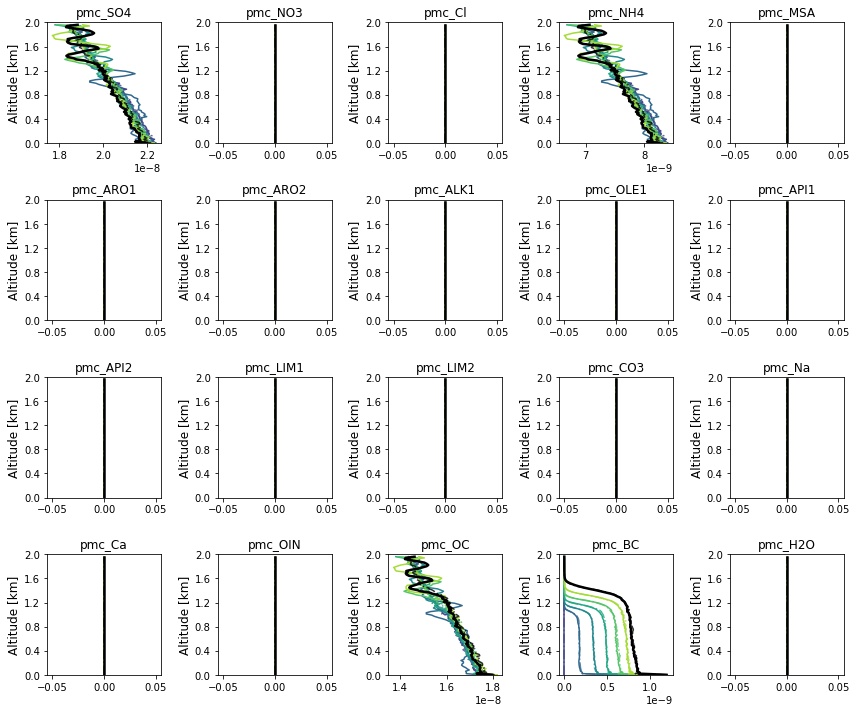

In [124]:
pbl_ztop = 100
pbl_depth = 1 #km

fig, axs = plt.subplots(4,5, figsize=(12, 10))
n_times = base_profile_data.shape[0]
#colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
n_hours = 6
colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))

for ax, species  in zip(axs.flatten(), aero_species):
    base_profile_data = basecase_aerodata[species][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    compare_profile_data = fx1fy1_aerodata[species][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

    for i in np.arange(n_times)[::12]:
        
        color_idx = floor(i/12)
        
        label = None
        lw=1.5
        if i%12 == 0:
            label=f'time = {color_idx} hrs'
        #print(i, n_times)
        if (i == n_times - 1):
            #print('setting black')
            lw=2.5
            colors[color_idx] = np.array([0, 0, 0, 1])

        ax.plot(compare_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, label=label, 
            #alpha=1-.3*(n_hours-color_idx)/n_hours, 
            lw=lw)
        ax.plot(base_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, 
            alpha=.8, 
            lw=1.5, ls='-.')

    #fig.suptitle(f'Level-averaged CCN activity (S={ss:2.2f}%)', fontsize=13)
    ax.set_title(f'{species}')
    #ax.set_xlabel('Number concentration [m^-3]', fontsize=12)
    ax.set_ylabel('Altitude [km]', fontsize=12)
    ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
    ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
    #ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
    #ax.set_xlim(.91, 1.02)
    ax.set_ylim(0, 101)
    #ax.legend(loc='upper left')
plt.tight_layout()
    

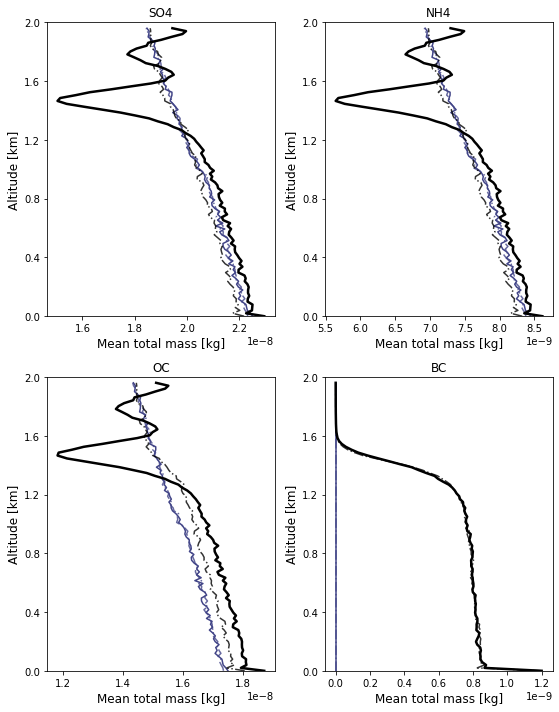

In [130]:
pbl_ztop = 100
pbl_depth = 1 #km

fig, axs = plt.subplots(2,2, figsize=(8, 10))
n_times = base_profile_data.shape[0]
#colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
n_hours = 6
colors = plt.cm.viridis(np.linspace(.2, 1, n_hours+1))

non_zero_aero_species = ['pmc_SO4',
                        'pmc_NH4',
                        'pmc_OC',
                        'pmc_BC']

for ax, species  in zip(axs.flatten(), non_zero_aero_species):
    base_profile_data = basecase_aerodata[species][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)
    compare_profile_data = fx1fy0_aerodata[species][:, :pbl_ztop, :, :].mean(axis=2).mean(axis=2)

    for i in np.arange(n_times)[::72]:
        
        color_idx = floor(i/12)
        
        label = None
        lw=1.5
        if i%12 == 0:
            label=f'time = {color_idx} hrs'
        #print(i, n_times)
        if (i == n_times - 1):
            #print('setting black')
            lw=2.5
            colors[color_idx] = np.array([0, 0, 0, 1])

        ax.plot(compare_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, label=label, 
            #alpha=1-.3*(n_hours-color_idx)/n_hours, 
            lw=lw)
        ax.plot(base_profile_data[i, :], np.arange(pbl_ztop), color=colors[color_idx], 
            zorder=i, 
            alpha=.8, 
            lw=1.5, ls='-.')

    #fig.suptitle(f'Level-averaged CCN activity (S={ss:2.2f}%)', fontsize=13)
    ax.set_title(f'{species.replace("pmc_", "")}')
    ax.set_xlabel('Mean total mass [kg]', fontsize=12)
    ax.set_ylabel('Altitude [km]', fontsize=12)
    ax.set_yticks(np.linspace(0, pbl_ztop+1, 6))
    ax.set_yticklabels(np.linspace(0,2.0, 6).round(2))
    #ax.axvline(x=0, ymin=0, ymax=1, ls='--', c='k', zorder=0)
    #ax.set_xlim(.91, 1.02)
    ax.set_ylim(0, 101)
    #ax.legend(loc='upper left')
plt.tight_layout()
    